In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(321, 481, 3)


(-0.5, 480.5, 320.5, -0.5)

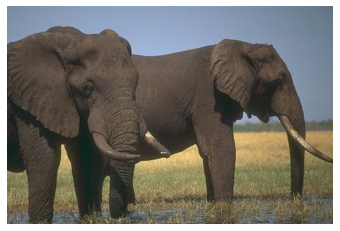

In [3]:
img = Image.open('test.jpg')
im = np.array(img)
print(im.shape)
flat_image=np.reshape(im, (im.shape[0]*im.shape[1],im.shape[2]))#Need to convert image into feature array based on rgb intensities
plt.figure(0)
plt.imshow(img)
plt.axis('off')

In [4]:
print(flat_image)

[[119 139 163]
 [119 139 163]
 [119 139 163]
 ...
 [ 62  67  63]
 [ 86  88  85]
 [ 82  87  83]]


In [5]:
flat_image.shape

#plt.imshow(flat_image)

(154401, 3)

26.09197751485922
[2 2 2 ... 0 0 0]
[0 1 2 3]


(-0.5, 480.5, 320.5, -0.5)

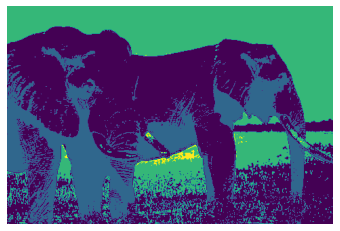

In [6]:
#Fitting mean shift algorithm to flatten image data set
from sklearn.cluster import MeanShift, estimate_bandwidth
#setting bandwidth or window size on data
bw=estimate_bandwidth(flat_image,quantile=0.12,n_samples=1000) #bandwidth is directly proportional to quantile,smaller bandwidth more number of clusters
print(bw)
#building mean_shift with estimated Bandwidth above on flatten image
ms = MeanShift(bandwidth=bw,bin_seeding=True)
labels=ms.fit_predict(flat_image)#finding model to image data and find clusters to which the objective data points belongs
print(labels)
print(np.unique(labels))
plt.figure(1)
plt.imshow(np.reshape(labels, [321,481])) #cmap= 'gray'
plt.axis('off')

In [8]:
labelsunique=np.unique(labels)

labelsunique

[0 1 2 3]


(-0.5, 480.5, 320.5, -0.5)

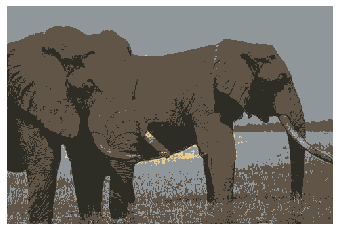

In [4]:

#Replacing ojective datapoints in segmented image with corresponding mode values
labelsunique=np.unique(labels)


mean=[]
for i in labelsunique:
    mean.append(np.mean(flat_image[labels==i],axis=0))

segimage=flat_image
for j in labelsunique:
    for i in range(flat_image.shape[0]):
        if(labels[i]==j):
            segimage[i,:]=mean[j]
#Showing the segmented image in RGB scale
plt.figure(2)
plt.imshow(np.reshape(segimage, [321,481,3]))
plt.axis('off')            
            
